In [88]:
# Student ID: 1009645706
# Student name: Devin de Silva
# Instructor: Dr. Shion Guha
# Course code: INF2178
# Program: MI
# Faculty of Information
# University of Toronto
# Assignment 3
# Date: March 23, 2023

In [89]:
import pandas as pd

df = pd.read_csv("/content/INF2178_A3_data.csv")
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [90]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
%pip install bioinfokit
from bioinfokit.analys import stat

In [91]:
# General information about the data
df.info()

# Confirming that there's no more null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

In [92]:
# General Statistical information
df1 = df.describe()
df1.round(2)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.00,11933.00,11933.00,11933.00,11933.00,11933.00,11933.00,11933.00,11933.00
mean,35.95,27.13,23.07,47.51,37.80,28.24,54317.20,54.32,1.90
std,10.47,9.12,7.40,14.33,12.03,7.58,36639.06,36.64,0.82
min,21.01,10.51,6.98,22.35,11.90,7.86,1.00,0.00,1.00
25%,29.34,20.68,17.39,38.95,29.27,22.80,27000.00,27.00,1.00
50%,34.06,25.68,22.95,45.32,36.41,28.58,47000.00,47.00,2.00
75%,39.89,31.59,28.30,51.77,44.22,33.78,72000.00,72.00,3.00
max,138.51,115.65,47.69,156.85,113.80,48.34,150000.00,150.00,3.00


In [93]:
# Create new variables: Change in scores for math, reading and general knowledge over the two semesters

df['c_math'] = df['springmathscore'] - df['fallmathscore']
df['c_reading'] = df['springreadingscore'] - df['fallreadingscore']
df['c_general'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup,c_math,c_reading,c_general
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,10.56,12.79,6.711
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,14.49,32.68,-0.738
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,4.24,-0.27,1.204
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,11.68,1.57,11.978
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,3.95,0.86,8.250


Text(0.5, 1.0, 'Changes in general knowledge scores by income group')

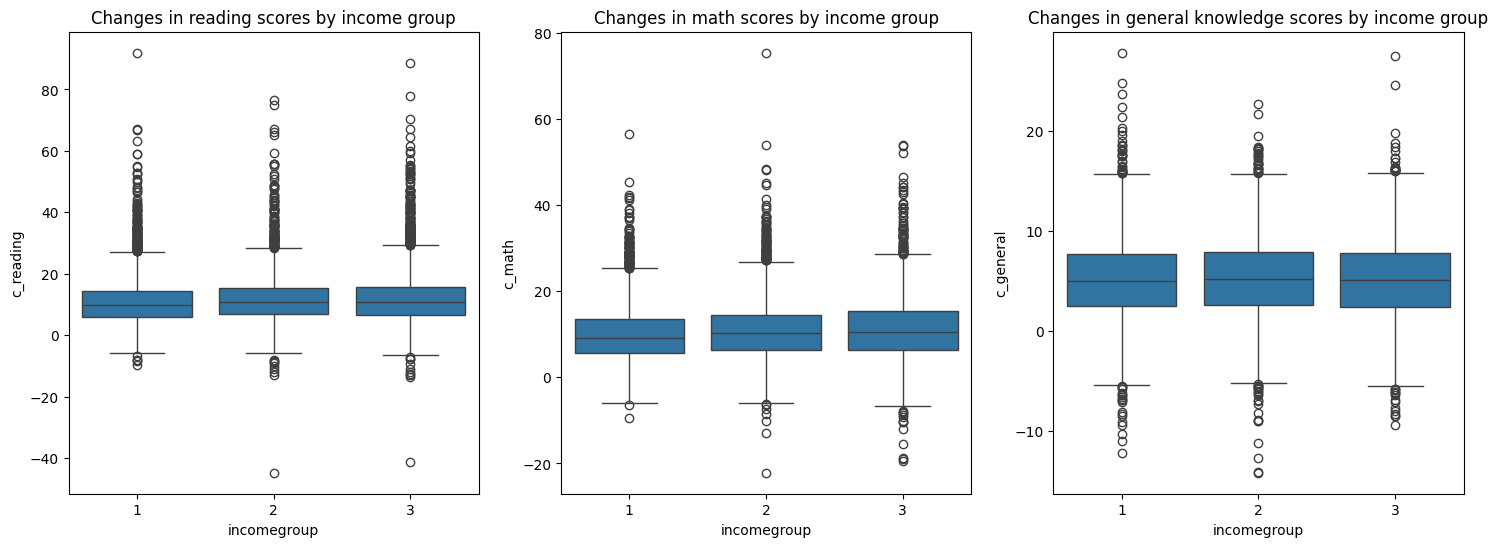

In [94]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='incomegroup', y='c_reading', data=df)
plt.title('Changes in reading scores by income group')

plt.subplot(1, 3, 2)
sns.boxplot(x='incomegroup', y='c_math', data=df)
plt.title('Changes in math scores by income group')

plt.subplot(1, 3, 3)
sns.boxplot(x='incomegroup', y='c_general', data=df)
plt.title('Changes in general knowledge scores by income group')

### ***Research Question 1: How does income influence the kindergarten students’ general knowledge scores over time, when controlling for their initial scores?***

In [95]:
# ANCOVA for General Knowledge over time, with using income group as the independent variable and fall general knowledge score the dependent variable

g = ols('springgeneralknowledgescore ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()
ancova_g = sm.stats.anova_lm(g, typ=2)
ancova_g

,sum_sq,df,F,PR(>F)
C(incomegroup),1756.904469,2.0,56.908040,2.525291e-25
fallgeneralknowledgescore,411876.768316,1.0,26682.269841,0.000000e+00
Residual,184140.179925,11929.0,NaN,NaN


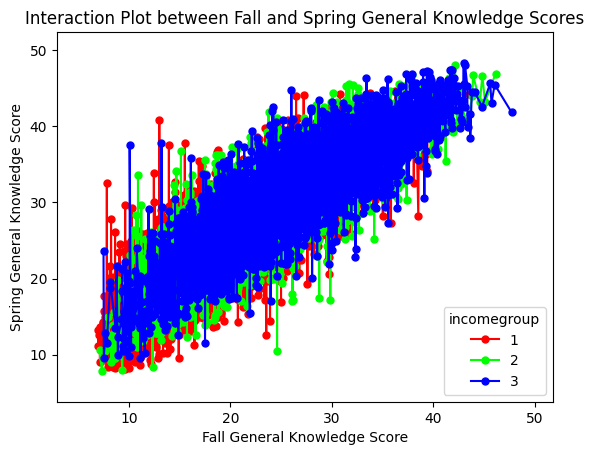

In [96]:
# Interaction Plot
interaction_1 = interaction_plot(df['fallgeneralknowledgescore'], df['incomegroup'], df['springgeneralknowledgescore'], ms=10, ax=plt.gca())

plt.title('Interaction Plot between Fall and Spring General Knowledge Scores')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Spring General Knowledge Score')
plt.show()


In [97]:
# Test for normality of residuals
normality = shapiro(g.resid)
normality

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9980394840240479, pvalue=3.155014791089705e-11)

Text(0.5, 1.0, 'QQ Plot of Residuals')

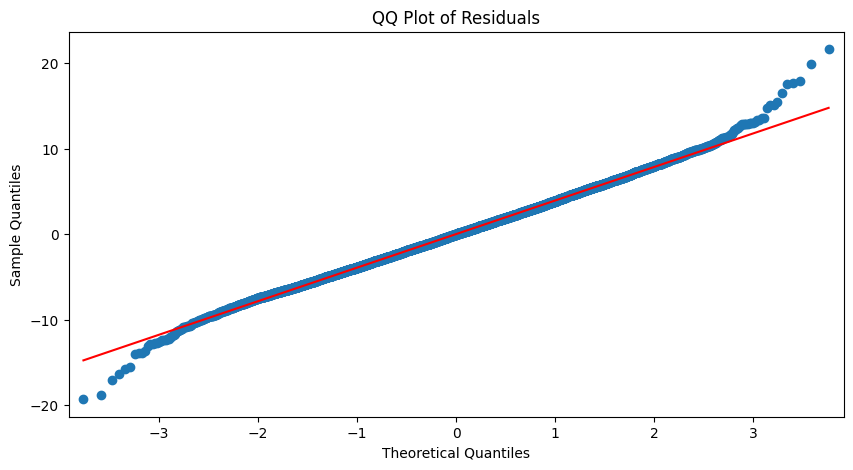

In [98]:
# QQ Plot for residuals
plt.figure(figsize=(10, 5))

sm.qqplot(g.resid, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

Text(0.5, 1.0, 'Histogram of Residuals')

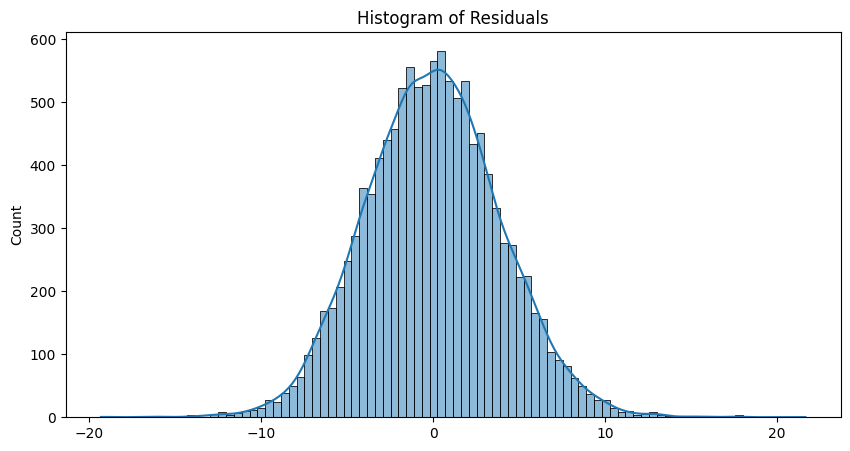

In [99]:
# Histogram for residuals
plt.figure(figsize=(10, 5))

sns.histplot(g.resid, kde=True)
plt.title('Histogram of Residuals')

In [100]:
# Test for homogeneity of variances
homogeneity = levene(df['springgeneralknowledgescore'][df['incomegroup'] == 1],
                          df['springgeneralknowledgescore'][df['incomegroup'] == 2],
                          df['springgeneralknowledgescore'][df['incomegroup'] == 3])
homogeneity

LeveneResult(statistic=9.405765903621088, pvalue=8.286000485876772e-05)

### ***Research Question 2: How students' math scores change over time by income group, using fall general knowledge scores as a baseline.***

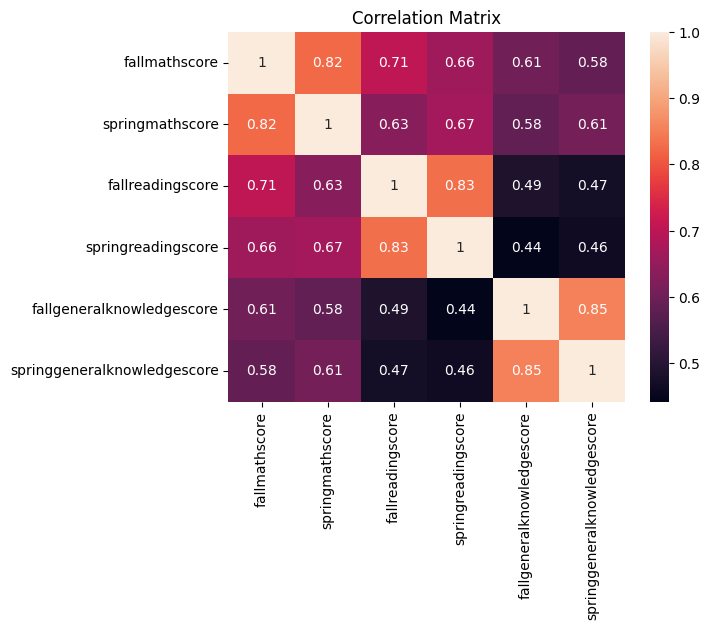

In [101]:
# Correlation matrix
correlation_matrix = df[['fallmathscore', 'springmathscore', 'fallreadingscore', 'springreadingscore', 'fallgeneralknowledgescore', 'springgeneralknowledgescore']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [102]:
# ANCOVA for math score changes, using income group as the independent variable with fall general knowledge score as the covariate
m = ols('c_math ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()
ancova_m = sm.stats.anova_lm(m, typ=2)
ancova_m

,sum_sq,df,F,PR(>F)
C(incomegroup),55.879616,2.0,0.624286,5.356614e-01
fallgeneralknowledgescore,22425.932956,1.0,501.083959,9.425259e-109
Residual,533880.499781,11929.0,NaN,NaN


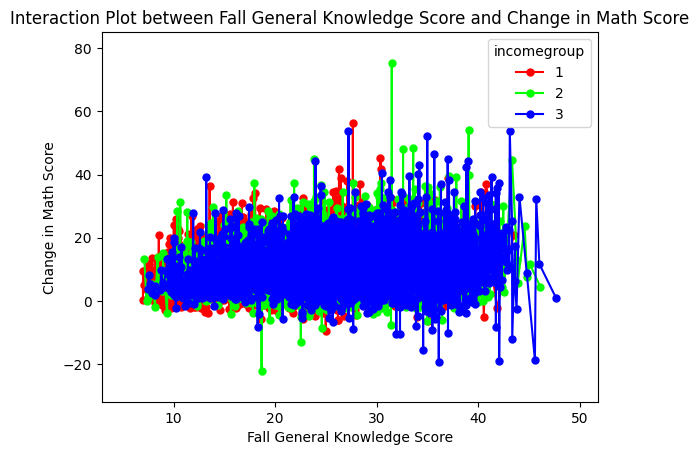

In [103]:
# Interaction Plot
interaction_2 = interaction_plot(df['fallgeneralknowledgescore'], df['incomegroup'], df['c_math'], ms=10, ax=plt.gca())
plt.title('Interaction Plot between Fall General Knowledge Score and Change in Math Score')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Math Score')
plt.show()

In [104]:
normality = shapiro(m.resid)
normality

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9664044380187988, pvalue=0.0)

Text(0.5, 1.0, 'QQ Plot of Residuals')

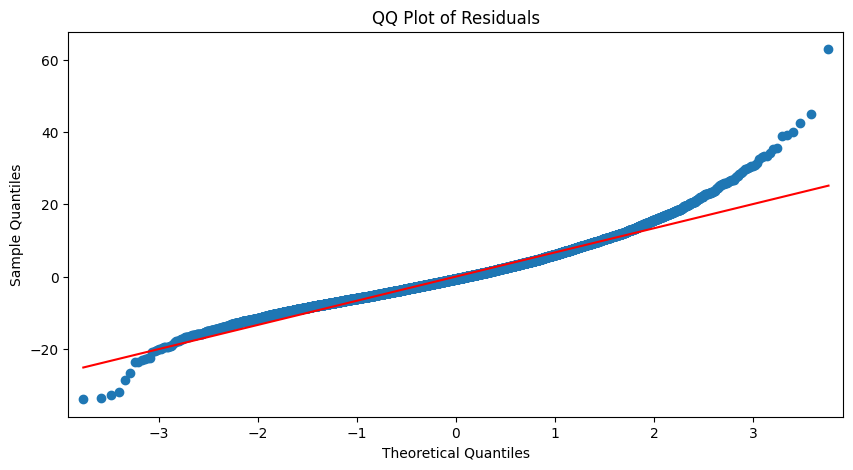

In [105]:
# QQ Plot for residuals
plt.figure(figsize=(10, 5))

sm.qqplot(m.resid, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

Text(0.5, 1.0, 'Histogram of Residuals')

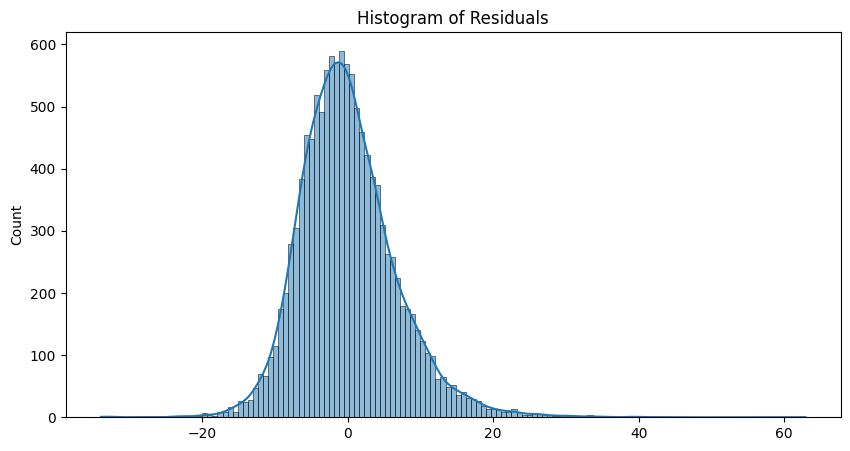

In [106]:
# Histogram for residuals
plt.figure(figsize=(10, 5))

sns.histplot(m.resid, kde=True)
plt.title('Histogram of Residuals')

In [107]:
homogeneity = levene(df['c_math'][df['incomegroup'] == 1],
  df['c_math'][df['incomegroup'] == 2],
  df['c_math'][df['incomegroup'] == 3])

homogeneity

LeveneResult(statistic=22.215180179067378, pvalue=2.344180384098772e-10)

### ***Research Question 3: How students' reading scores change over time by income group, using fall general knowledge scores as a baseline.***

In [108]:
# ANCOVA for reading score changes over time, using income group as the independent variable with fall general knowledge score as the covariate
r = ols('c_reading ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()
ancova_r = sm.stats.anova_lm(r, typ=2)
ancova_r

,sum_sq,df,F,PR(>F)
C(incomegroup),287.485906,2.0,2.251247,1.053126e-01
fallgeneralknowledgescore,14054.124684,1.0,220.110317,2.354473e-49
Residual,761671.036393,11929.0,NaN,NaN


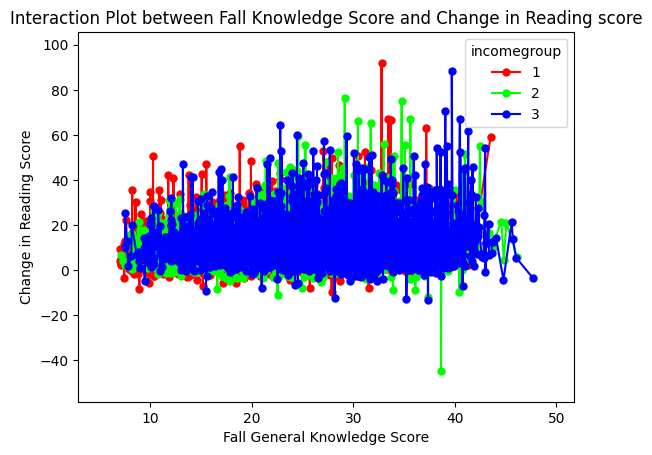

In [109]:
# Interaction Plot
interaction_3 = interaction_plot(df['fallgeneralknowledgescore'], df['incomegroup'], df['c_reading'], ms=10, ax=plt.gca())

plt.title('Interaction Plot between Fall Knowledge Score and Change in Reading score')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Reading Score')
plt.show()

In [110]:
normality = shapiro(r.resid)
normality

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8996317386627197, pvalue=0.0)

Text(0.5, 1.0, 'QQ Plot of Residuals')

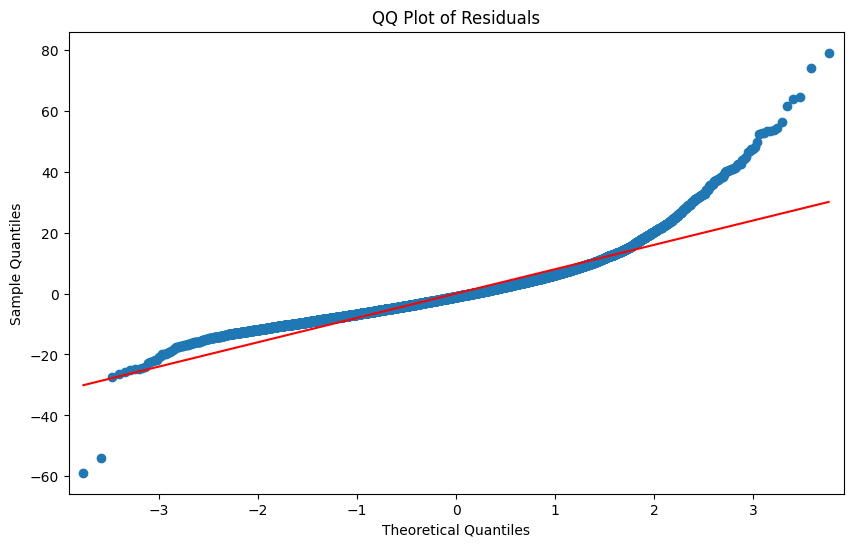

In [114]:
# QQ Plot for residuals
plt.figure(figsize=(10, 6))

sm.qqplot(r.resid, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

Text(0.5, 1.0, 'Histogram of Residuals')

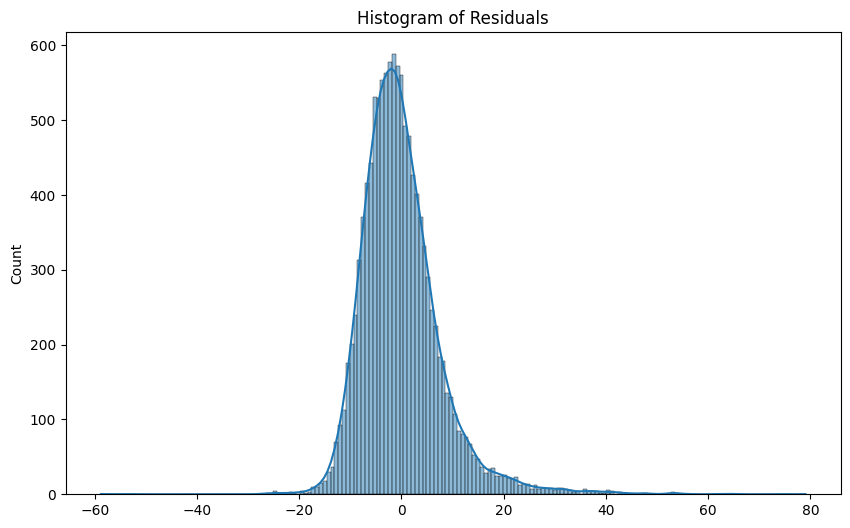

In [115]:
# Histogram for residuals
plt.figure(figsize=(10, 6))

sns.histplot(r.resid, kde=True)
plt.title('Histogram of Residuals')

In [113]:
homogeneity = levene(df['c_reading'][df['incomegroup'] == 1],
  df['c_reading'][df['incomegroup'] == 2],
  df['c_reading'][df['incomegroup'] == 3])

homogeneity

LeveneResult(statistic=19.7280103692154, pvalue=2.794929503613517e-09)